## Customer Churn Data Analysis

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.special import expit, softmax 

### Data Loading

In [173]:
df = pd.read_csv("./data/customer_churn.csv")

df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [174]:
company_counts = df.groupby('Company').size()
filtered_counts = company_counts[company_counts > 1]
num_companies = filtered_counts.count()
print(num_companies)

23


Overlap in companies, maybe not delete

In [175]:
location_counts = df.groupby('Location').size()
locat_filter = location_counts[location_counts > 1]
new_locations = locat_filter.count()
print(new_locations)

0


Locations never overlap, can delete

In [176]:
df = df.drop('Location', axis=1)

In [177]:
date_counts = df.groupby('Onboard_date').size()
date_filter = date_counts[date_counts > 1]
new_dates = date_filter.count()
print(new_dates)

0


Dates never ovelap, can delete

In [178]:
df = df.drop('Onboard_date', axis=1)

In [179]:
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,"Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,Love-Jones,1


See if company makes a large difference. delete later if difference is very small

In [180]:
df.shape

(900, 8)

In [181]:
df.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Company          900 non-null    object 
 7   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 56.4+ KB


Visualize Churn or Not Churn

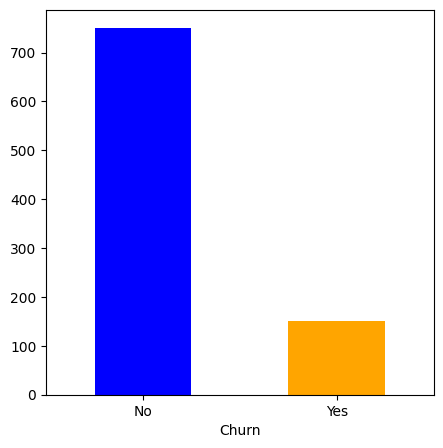

In [183]:
churn_count = df['Churn'].value_counts()
plt.figure(figsize =(5, 5))
churn_count.plot(kind="bar", color=['blue', 'orange'])
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.show()

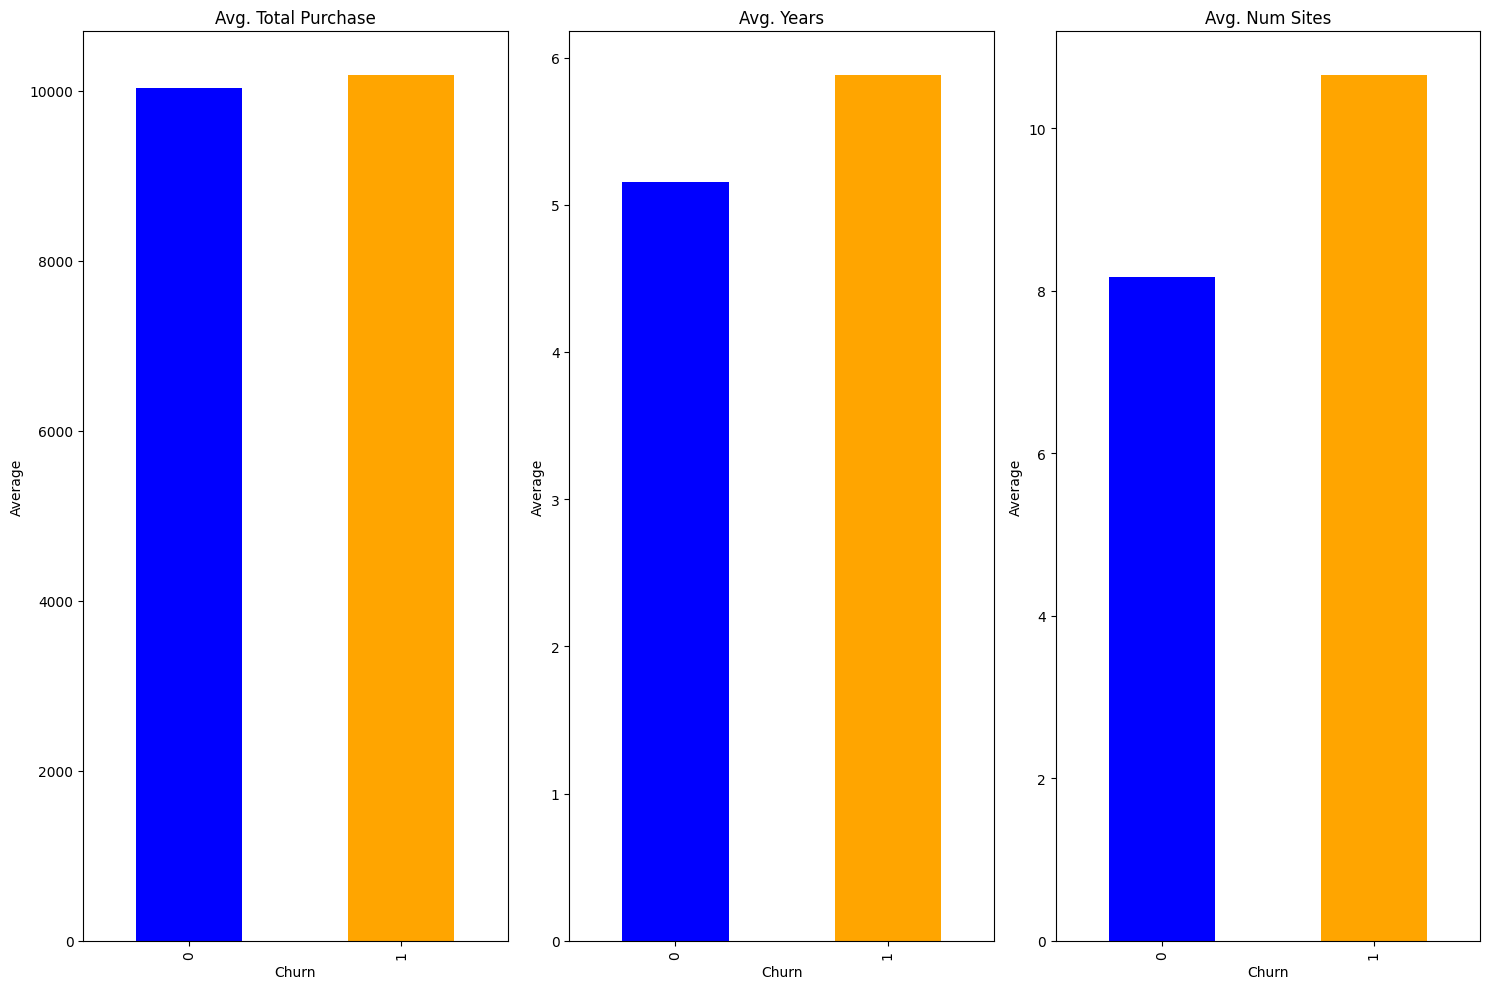

In [184]:
numeric_cols = df.drop('Account_Manager', axis=1)
numeric_cols = df.select_dtypes(include='number').columns
churn_stats = df.groupby('Churn')[numeric_cols].mean()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))

titles = ['Avg. Total Purchase', 'Avg. Years', 'Avg. Num Sites']
columns = ['Total_Purchase', 'Years', 'Num_Sites']
colors = ['blue', 'orange']

for ax, title, column in zip(axes.flatten(), titles, columns):
    churn_stats[column].plot(kind='bar', ax=ax, color=colors)
    ax.set_title(title)
    ax.set_xlabel('Churn')
    ax.set_ylabel('Average')

plt.tight_layout()
plt.show()

- Total Price: 이탈 고객과 이탈하지 않은 고객 모두의 평균 총 구매가 유사하다면 구매 금액만으로는 이탈을 예측하는 중요한 변수가 아니라는 것을 의미
- Years: 이탈한 고객이 평균적으로 거래 유지가 오래 됐다면, 장기적인 고객 만족도에 잠재적인 문제가 있음을 나타낼 수 있음.
- Num Sites: 이탈한 고객이 평균적으로 더 많은 사이트를 보유하고 있다면 이는 더 많은 사이트를 관리하는 고객이 특정 문제에 직면하거나 충족되지 않는 더 높은 기대치를 갖고 있음을 의미할 수 있음.

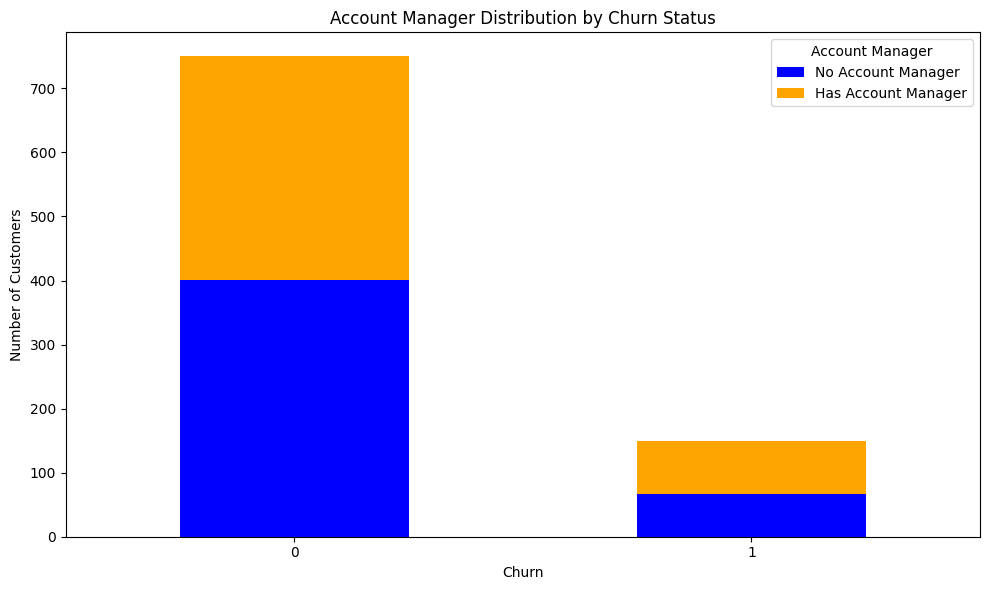

In [185]:
account_manager_churn = df.groupby(['Churn', 'Account_Manager']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

account_manager_churn.plot(kind='bar', stacked=True, ax=ax, color=['blue', 'orange'])
ax.set_title('Account Manager Distribution by Churn Status')
ax.set_xlabel('Churn')
ax.set_ylabel('Number of Customers')
ax.legend(['No Account Manager', 'Has Account Manager'], title='Account Manager')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/var/folders/kg/34cc9xz542b30xmkb22dxrp00000gn/T/ipykernel_91610/1839475525.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_churn = df.groupby('Age_Group')['Churn'].mean()


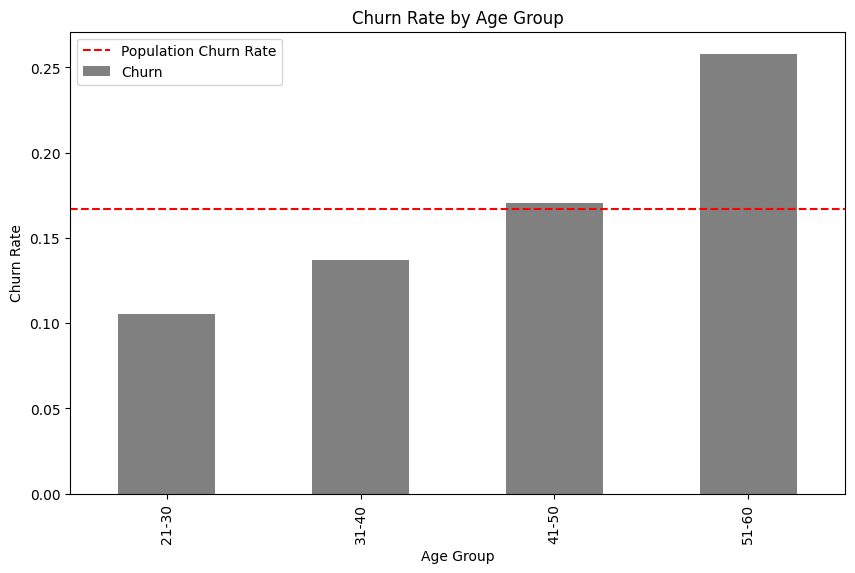

In [186]:
# Define age groups
age_bins = [20, 30, 40, 50, 60]
age_labels = ['21-30', '31-40', '41-50', '51-60']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate churn rate by age group
age_group_churn = df.groupby('Age_Group')['Churn'].mean()

# Plotting the churn rate by age group
plt.figure(figsize=(10, 6))
age_group_churn.plot(kind='bar', color='grey')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.axhline(y=df['Churn'].mean(), color='red', linestyle='--', label='Population Churn Rate')
plt.legend()
plt.show()


In [187]:
df = pd.get_dummies(df, columns=['Company'], dtype=int)

In [188]:
x = df.drop(columns=['Churn', 'Names', 'Age_Group'])
y = df['Churn']

In [189]:
x.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Company_Abbott-Thompson,Company_Acosta PLC,"Company_Adams, Dominguez and Vasquez",Company_Adams-Crawford,Company_Adams-Gibbs,...,"Company_Yates, Martinez and Cox",Company_Young and Sons,"Company_Young, Porter and Hill",Company_Young-Dunn,Company_Young-Newman,Company_Yu-Murillo,Company_Zamora-Cherry,Company_Zhang-Brown,Company_Zimmerman Group,"Company_Zuniga, Clark and Shaffer"
0,42.0,11066.80,0,7.22,8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41.0,11916.22,0,6.50,11.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38.0,12884.75,0,6.67,12.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,42.0,8010.76,0,6.71,10.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37.0,9191.58,0,5.56,9.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

### Split the Data

In [191]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

### Scale Data

In [192]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)


### Train Data

In [193]:
logi = LogisticRegression()
logi.fit(scaled_train, y_train)

LogisticRegression()

In [194]:
pred = logi.predict(scaled_test)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [195]:
logi.score(scaled_test, y_test)

0.8388888888888889

In [196]:
from sklearn.metrics import roc_auc_score

In [197]:
roc_auc_score(y_test, pred)

0.5278602420643983

## Delete Company

In [198]:
drop_company = df.filter(like="Company").columns
df_drop_c = df.drop(drop_company, axis=1)

In [199]:
df_drop_c.drop("Age_Group", axis=1)
df_drop_c.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn,Age_Group
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1,41-50
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1,41-50
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1,31-40
3,Phillip White,42.0,8010.76,0,6.71,10.0,1,41-50
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1,31-40


In [200]:
new_x = df_drop_c[['Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites']]
new_y = df_drop_c['Churn']

In [201]:
new_x.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites
0,42.0,11066.80,0,7.22,8.0
1,41.0,11916.22,0,6.50,11.0
2,38.0,12884.75,0,6.67,12.0
3,42.0,8010.76,0,6.71,10.0
4,37.0,9191.58,0,5.56,9.0


In [202]:
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.2, random_state=13)

In [203]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [204]:
logi = LogisticRegression()

In [205]:
logi.fit(scaled_train, y_train)

LogisticRegression()

In [206]:
logi.score(scaled_test, y_test)

0.8833333333333333

Better than before (0.833)

In [207]:
pred = logi.predict(scaled_test)

In [208]:
roc_auc_score(y_test, pred)

0.7075816396437544

In [ ]:
df = pd.get_dummies(df, columns=['Company'], dtype=int)

ROC better than before (0.527)

## Delete Total Purchases

In [209]:
df_drop_c.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn,Age_Group
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1,41-50
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1,41-50
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1,31-40
3,Phillip White,42.0,8010.76,0,6.71,10.0,1,41-50
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1,31-40


In [212]:
new_x = df_drop_c[['Age', 'Account_Manager', 'Years', 'Num_Sites']]
new_y = df_drop_c['Churn']

In [218]:
new_x.head()

,Age,Account_Manager,Years,Num_Sites
0,42.0,0,7.22,8.0
1,41.0,0,6.50,11.0
2,38.0,0,6.67,12.0
3,42.0,0,6.71,10.0
4,37.0,0,5.56,9.0


In [213]:
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.2, random_state=13)

In [214]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [215]:
logi = LogisticRegression()

In [216]:
logi.fit(scaled_train, y_train)

LogisticRegression()

In [217]:
logi.score(scaled_test, y_test)

0.8833333333333333

Same as before

In [219]:
pred = logi.predict(scaled_test)

In [220]:
roc_auc_score(y_test, pred)

0.7075816396437544

Same as before

In [221]:
from sklearn.metrics import classification_report

In [222]:
report = classification_report(y_test, pred, target_names=['Non-Churn', 'Churn'])
print(report)

              precision    recall  f1-score   support

   Non-Churn       0.90      0.97      0.93       151
       Churn       0.72      0.45      0.55        29

    accuracy                           0.88       180
   macro avg       0.81      0.71      0.74       180
weighted avg       0.87      0.88      0.87       180



Class Imbalance -> 151 Non-churn and 29 Churn

## Extra: SMOTE

In [224]:
from imblearn.over_sampling import SMOTE

In [225]:
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(scaled_train, y_train)


In [226]:
logi.fit(x_train_res, y_train_res)

LogisticRegression()

In [232]:
logi.score(scaled_test, y_test)

0.8333333333333334

In [233]:
y_pred_res = logi.predict(scaled_test)

In [235]:
report = classification_report(y_test, y_pred_res, target_names=['Non-Churn', 'Churn'])
print(report)

              precision    recall  f1-score   support

   Non-Churn       0.95      0.85      0.90       151
       Churn       0.49      0.76      0.59        29

    accuracy                           0.83       180
   macro avg       0.72      0.80      0.74       180
weighted avg       0.87      0.83      0.85       180



In [236]:
roc_auc_score(y_test, y_pred_res)

0.8031514044302352

A lot better than before (0.707)

In [241]:
import sklearn.metrics as metrics

In [242]:
prob = logi.predict_proba(scaled_test)

In [243]:
preds = prob[:,1]

In [244]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

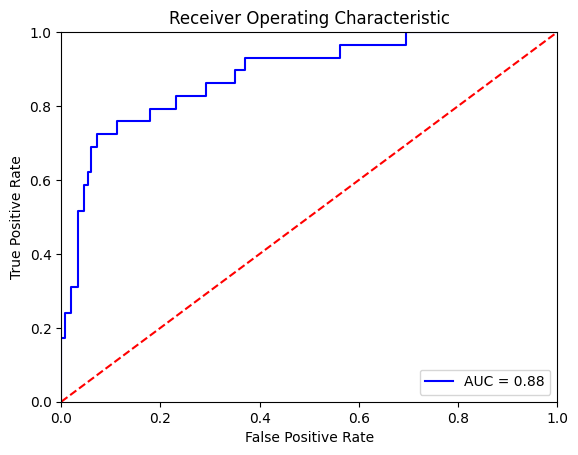

In [245]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [249]:
roc_auc_score(y_test, y_pred_res)

0.8031514044302352